In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, f1_score, accuracy_score, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
url = 'D:\App Exes\VS Code\Proyecto Final Data\healthcare-dataset-stroke-data.csv'

In [8]:
df = pd.read_csv(url, sep = ',')

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df = pd.get_dummies(df, columns=['work_type'], prefix='work_type')
df = pd.get_dummies(df, columns=['smoking_status'], prefix='smoking_status')
#Reemplaza valores nulos de BMI promediando por rango edades cercanas
promedio_bmi_edades = df.groupby('age')['bmi'].mean()
df['bmi'] = df.apply(lambda row: promedio_bmi_edades[row['age']] if pd.isnull(row['bmi']) else row['bmi'], axis=1)

#Reemplazo valores strings por valores numericos
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other': 2})
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})

df_stroke = df.loc[df['stroke'] == 1]
df_nostroke = df.loc[df['stroke'] == 0]

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.60,1,False,False,True,False,False,False,True,False,False
1,51676,0,61.0,0,0,1,0,202.21,30.19,1,False,False,False,True,False,False,False,True,False
2,31112,1,80.0,0,1,1,0,105.92,32.50,1,False,False,True,False,False,False,False,True,False
3,60182,0,49.0,0,0,1,1,171.23,34.40,1,False,False,True,False,False,False,False,False,True
4,1665,0,79.0,1,0,1,0,174.12,24.00,1,False,False,False,True,False,False,False,True,False


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


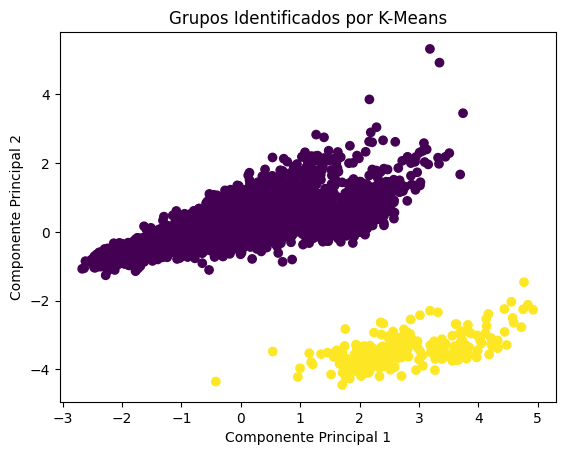

In [12]:
# Seleccionar las características para el análisis de clustering
X = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['cluster'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


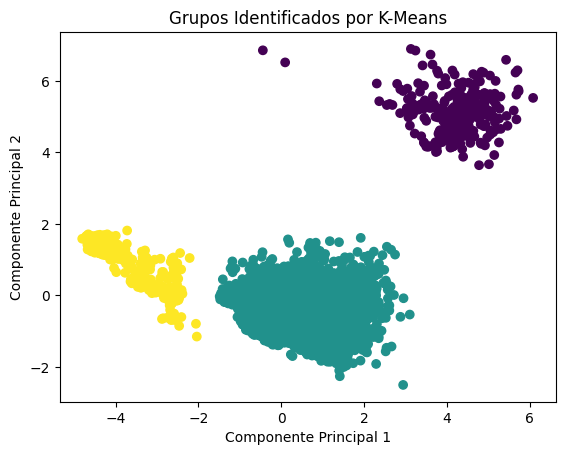

In [15]:
#Seleccionar las características para el análisis de clustering
X = df

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=16)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['cluster2'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,cluster,cluster2
0,9046,1,67.0,0,1,1,1,228.69,36.60,1,...,False,True,False,False,False,True,False,False,1,0
1,51676,0,61.0,0,0,1,0,202.21,30.19,1,...,False,False,True,False,False,False,True,False,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.50,1,...,False,True,False,False,False,False,True,False,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.40,1,...,False,True,False,False,False,False,False,True,1,0
4,1665,0,79.0,1,0,1,0,174.12,24.00,1,...,False,False,True,False,False,False,True,False,1,0


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

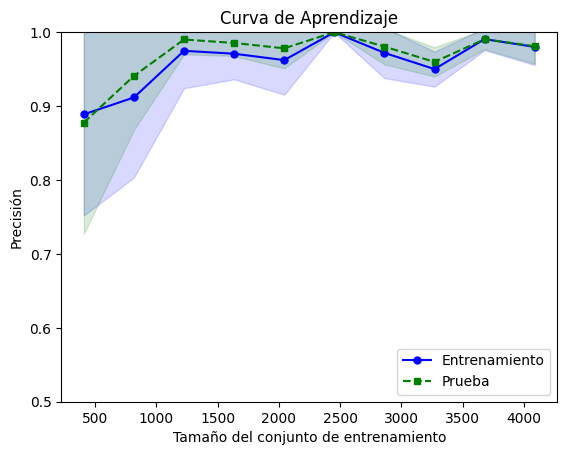

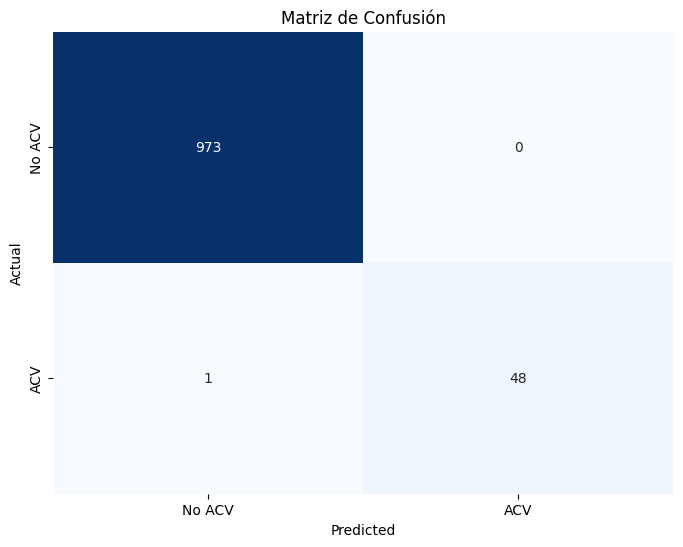

F1-score en datos de entrenamiento: 1.0
F1-score en datos de prueba: 0.9896907216494846
Precisión en datos de entrenamiento: 1.0
Precisión en datos de prueba: 0.9990215264187867


In [17]:
# Seleccionar las características y la variable objetivo para df
X = df.drop(columns = "stroke")
y = df['stroke']

# Dividir df en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Crear el modelo de regresión logística
reg = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
reg.fit(X_train, y_train)

# Predecir los valores de stroke para los datos de entrenamiento y prueba
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

# Calcular la precisión para los datos de entrenamiento y prueba
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(reg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Prueba')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

# Obtener las predicciones del modelo para los datos de prueba
y_pred = reg.predict(X_test)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crear un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.xticks([0.5, 1.5], ['No ACV', 'ACV'])
plt.yticks([0.5, 1.5], ['No ACV', 'ACV'])
plt.show()

# Calcular el F1-score para los datos de entrenamiento y prueba
train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

print("F1-score en datos de entrenamiento:", train_f1)
print("F1-score en datos de prueba:", test_f1)

print("Precisión en datos de entrenamiento:", train_acc)
print("Precisión en datos de prueba:", test_acc)

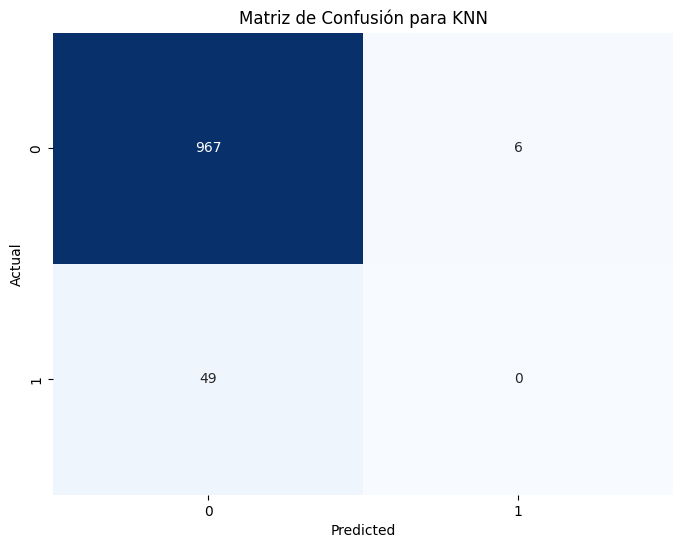

Precisión de KNN en datos de prueba: 0.9461839530332681


In [18]:
# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Predecir los valores de stroke para los datos de prueba
knn_test_pred = knn_model.predict(X_test)

# Calcular la precisión para los datos de prueba
knn_test_acc = accuracy_score(y_test, knn_test_pred)
# Crear la matriz de confusión para KNN
cm_knn = confusion_matrix(y_test, knn_test_pred)

# Crear el heatmap de la matriz de confusión para KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión para KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Precisión de KNN en datos de prueba:", knn_test_acc)


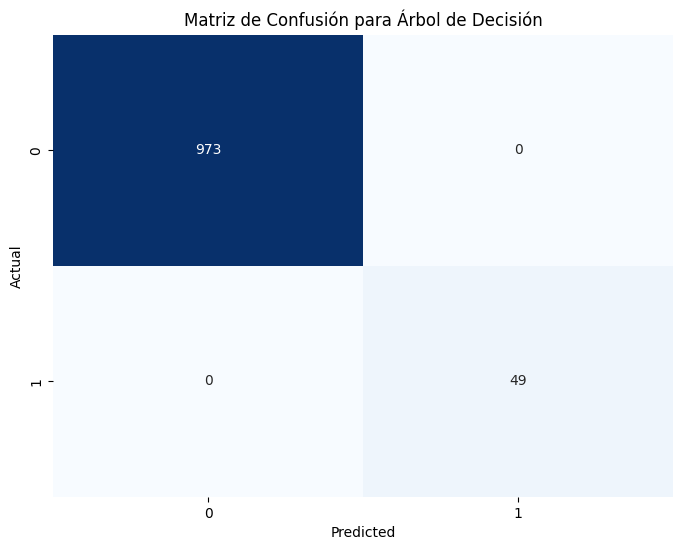

Precisión del Árbol de Decisión en datos de prueba: 1.0


In [19]:
# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(max_depth=3)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Predecir los valores de stroke para los datos de prueba
tree_test_pred = tree_model.predict(X_test)

# Calcular la precisión para los datos de prueba
tree_test_acc = accuracy_score(y_test, tree_test_pred)
# Crear la matriz de confusión para Árbol de Decisión
cm_tree = confusion_matrix(y_test, tree_test_pred)

# Crear el heatmap de la matriz de confusión para Árbol de Decisión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión para Árbol de Decisión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Precisión del Árbol de Decisión en datos de prueba:", tree_test_acc)

In [20]:
# Definir los modelos
models = [reg, knn_model, tree_model]

# Definir una función para calcular el F1-score en lugar de accuracy
f1_scorer = make_scorer(f1_score)

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring=f1_scorer)
    print(f"F1-score promedio para {model.__class__.__name__}: {scores.mean():.2f} (+/- {scores.std():.2f})")

F1-score promedio para LogisticRegression: 0.62 (+/- 0.47)


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

F1-score promedio para KNeighborsClassifier: 0.02 (+/- 0.02)
F1-score promedio para DecisionTreeClassifier: 1.00 (+/- 0.00)


Epoch 1/50
103/103 - 1s - loss: 0.4799 - accuracy: 0.8624 - val_loss: 0.3091 - val_accuracy: 0.9645 - 569ms/epoch - 6ms/step
Epoch 2/50
103/103 - 0s - loss: 0.1739 - accuracy: 0.9856 - val_loss: 0.0962 - val_accuracy: 0.9902 - 91ms/epoch - 884us/step
Epoch 3/50
103/103 - 0s - loss: 0.0520 - accuracy: 0.9976 - val_loss: 0.0322 - val_accuracy: 0.9988 - 87ms/epoch - 848us/step
Epoch 4/50
103/103 - 0s - loss: 0.0195 - accuracy: 0.9997 - val_loss: 0.0152 - val_accuracy: 1.0000 - 89ms/epoch - 865us/step
Epoch 5/50
103/103 - 0s - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000 - 85ms/epoch - 821us/step
Epoch 6/50
103/103 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000 - 84ms/epoch - 816us/step
Epoch 7/50
103/103 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 83ms/epoch - 806us/step
Epoch 8/50
103/103 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000 - 87ms/epoch - 845u

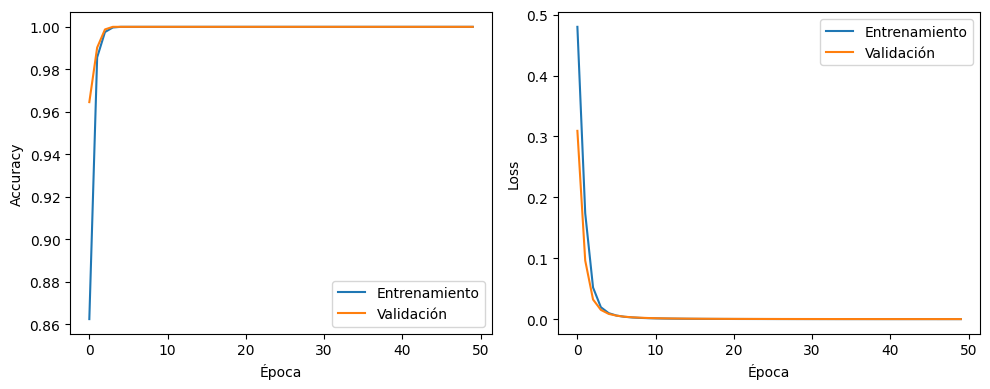

32/32 [==============================] - 0s 452us/step


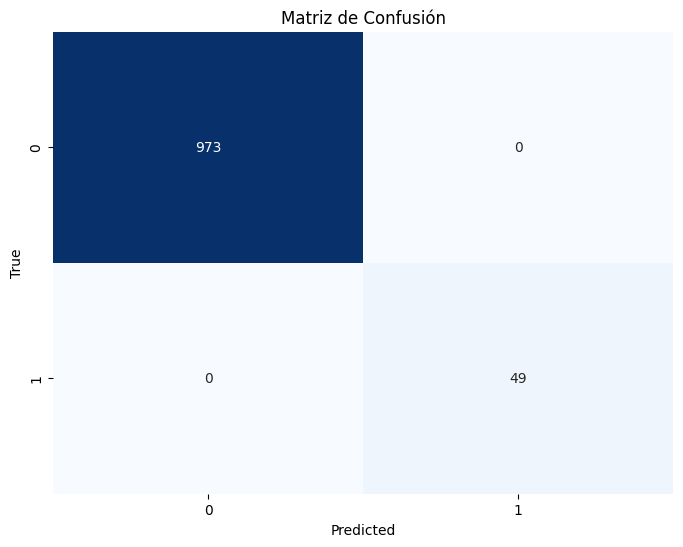

In [24]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo y guardar el historial de entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Graficar el aprendizaje (accuracy y loss)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluar el modelo en los datos de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

In [27]:
# Definir el número de folds para la validación cruzada
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar las métricas de cada fold
fold_accuracies = []
fold_losses = []

# Realizar la validación cruzada
for fold, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train)):
    print(f"Fold {fold + 1}/{n_splits}")
    
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]  # Corregir índices
    
    # Crear el modelo de red neuronal
    model = Sequential()
    model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compilar el modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
    
    # Evaluar el modelo en los datos de validación del fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    fold_losses.append(val_loss)
    fold_accuracies.append(val_accuracy)
    
# Calcular y mostrar las métricas promedio de la validación cruzada
mean_accuracy = np.mean(fold_accuracies)
mean_loss = np.mean(fold_losses)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.4f}")
print(f"Mean Cross-Validation Loss: {mean_loss:.4f}")

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean Cross-Validation Accuracy: 1.0000
Mean Cross-Validation Loss: 0.0000
